# Importing Packages

In [12]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

### Useful functions

In [13]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )



# Preparing data

## Reading from file

In [14]:
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
#df = pd.read_csv('autos.csv.gz', sep=',', header=0, compression='gzip',encoding='cp1252')
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
135050,2016-03-10 22:51:15,BMW_320i_Touring,privat,Angebot,11780,control,kombi,2008,manuell,170,3er,150000,9,benzin,bmw,nein,2016-03-10 00:00:00,0,53332,2016-03-12 04:44:45
278791,2016-03-22 22:48:38,Mercedes_Benz_E200_Kompressor_Gepflegt/_TOP_An...,privat,Angebot,6950,control,limousine,2003,NaN,163,e_klasse,125000,11,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,21073,2016-03-25 15:21:13
47761,2016-03-20 19:42:52,BMW_318i,privat,Angebot,600,test,limousine,1994,manuell,116,3er,150000,7,benzin,bmw,nein,2016-03-20 00:00:00,0,17217,2016-04-07 03:44:28
60821,2016-03-26 12:56:28,Corsa_B_1.2l,privat,Angebot,100,control,kleinwagen,1996,manuell,46,NaN,150000,7,benzin,opel,ja,2016-03-26 00:00:00,0,27432,2016-03-29 15:15:59
83441,2016-04-01 17:52:12,Corsa_c_diesel_Tuev_bis_11.2017,privat,Angebot,1800,test,kleinwagen,2003,manuell,67,corsa,150000,2,diesel,opel,NaN,2016-04-01 00:00:00,0,89584,2016-04-05 13:17:37
64410,2016-03-08 16:56:34,A4__1.9_NAVI_LEDER,privat,Angebot,2100,test,kleinwagen,2002,NaN,0,a4,150000,6,diesel,audi,NaN,2016-03-08 00:00:00,0,28195,2016-03-08 16:56:34
185020,2016-03-12 10:56:53,Renault_Megane_1.9_dCi_FAP_Coupe_Cabriolet_Dyn...,privat,Angebot,4800,control,cabrio,2008,manuell,131,megane,150000,4,diesel,renault,nein,2016-03-12 00:00:00,0,53518,2016-03-20 09:16:16
315272,2016-03-12 17:50:57,Nissan_NX_100,privat,Angebot,0,test,NaN,2018,manuell,100,andere,125000,0,benzin,nissan,nein,2016-03-12 00:00:00,0,19053,2016-03-15 04:17:36
167868,2016-03-07 14:57:09,simson_sr_50_tausch,privat,Angebot,1000,control,NaN,1990,manuell,0,NaN,100000,0,andere,sonstige_autos,nein,2016-03-07 00:00:00,0,23795,2016-03-16 00:15:23
225396,2016-03-09 14:48:59,Mercedes_Sportcoupe_220,privat,Angebot,3000,test,coupe,2002,manuell,200,NaN,150000,6,benzin,mercedes_benz,ja,2016-03-09 00:00:00,0,22457,2016-03-10 10:44:55


In [15]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# Dropping some useless columns


In [16]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


In [17]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)


## Cleaning data

Cleaning data from duplicates, NaNs and selecting reasonable ranges for columns


In [18]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price<100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))


Too new: 14680
Too old: 289
Too cheap: 13320
Too expensive:  232
Too few km:  0
Too many km:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damages:  [nan 'ja' 'nein']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


## Working on the `null` values

Checking if theree are NaNs to fix or drop

In [19]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

In [20]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

Checking if all the nulls have been filled or dropped.

In [21]:
dedups.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

OK, we're clear. Let's do some visualization now.

## Visualizations
### Categories distribution
Let's see some charts to understand how data is distributed across the categories

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


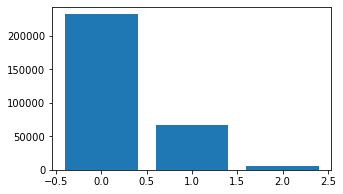

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


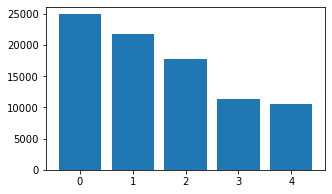

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


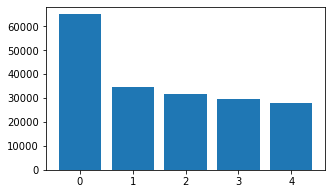

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


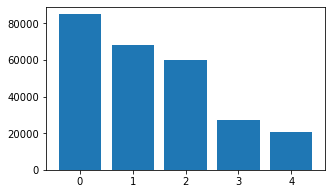

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


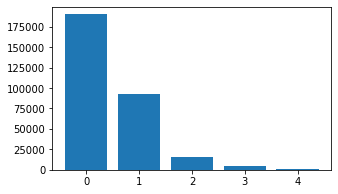

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


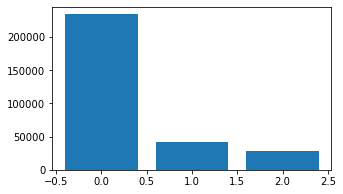

In [23]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    #plt.xticks(r, g.index)
    plt.show()

### Feature engineering

Adding the name length to see how much does a long description influence the price

/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


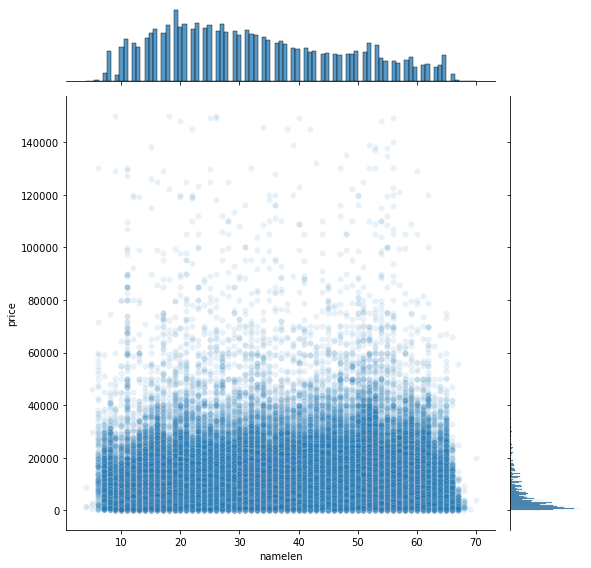

In [24]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)




In [25]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]


In [26]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])

0.6224184813880769

Labels for the name column account for 62% of the total. I think it's too much, so I remove the feature.

In [27]:
labeled.drop(['name_feat'], axis='columns', inplace=True)

/var/folders/b6/h99y3_fn56ngqxrt7f75kjzm0000gn/T/ipykernel_32992/1069619512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled.drop(['name_feat'], axis='columns', inplace=True)


### Correlations

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196
brand_feat,-0.105694,-0.044526,-0.310254,-0.026645,-0.012156,0.100056,0.125735,0.016474,0.472098,1.000000,-0.023840,-0.102601


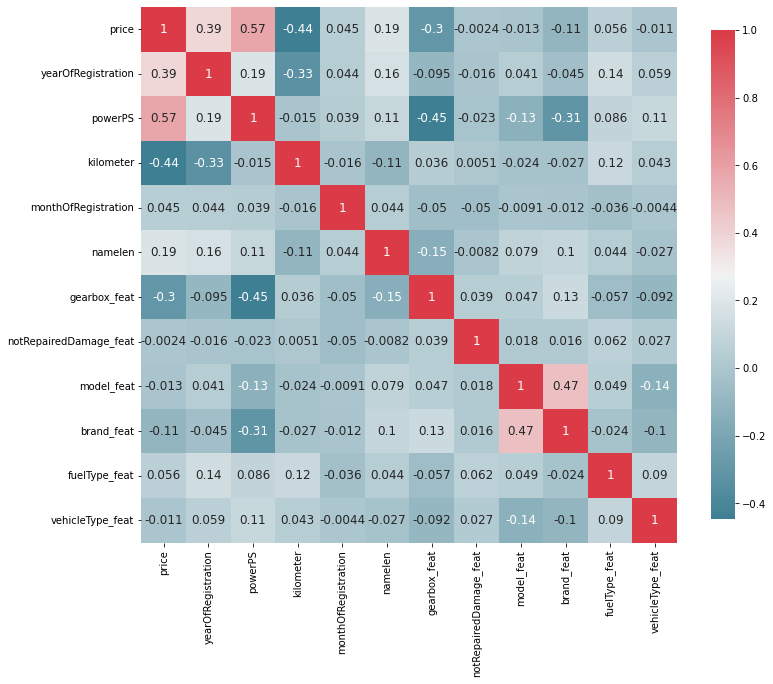

In [28]:
plot_correlation_map(labeled)
labeled.corr()

In [29]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64

/var/folders/b6/h99y3_fn56ngqxrt7f75kjzm0000gn/T/ipykernel_32992/3971658953.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


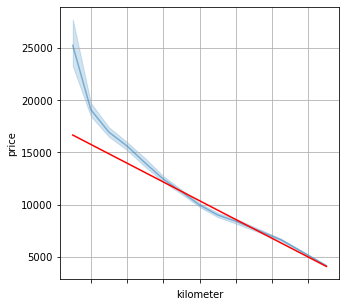

In [49]:

df1=df.copy(deep=True)
df1=df1.drop(df1[df1.powerPS<1].index)
df1=df1.drop(df1[df1.powerPS<10].index)
df1=df1.drop(df1[(df1.powerPS<30)&(df1.yearOfRegistration>1980)&(df1.brand!="TRABANT")].index)
df1=df1.drop(df1[df1.fuelType=='andere'].index)
df1.monthOfRegistration.max()
df1=df1.drop(df1[df1.price<200].index)

df1[df1.price==500].sort_values(by="yearOfRegistration", ascending=False)
#df1=df1.drop(df1[df1.price<200].index)

df1=df1.drop(df1[(df1.price<1000)&(df1.yearOfRegistration>2008)].index)
df1=df1.drop(df1[(df1.price<1000)&(df1.yearOfRegistration>2005)].index)
df=df.drop(df.loc[df.price>=1.9*1e6].index)

df1.rename(columns={"notRepairedDamage":"salvaged"}, inplace=True)

plt.subplots(figsize=(5, 5))
g=sns.lineplot(x=df1[df1.kilometer>=10000].kilometer ,y=df1.price[df1.kilometer>=10000],  alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.grid(axis='both')
a,b=np.polyfit(df1[df1.price<=0.01e7].kilometer, df1[df1.price<=0.01e7].price, 1)
xx=np.array([10000 , 150000])
y=a*xx+b
h=sns.lineplot(xx, y, color='red')
#g.margins(tight=True)
#h.margins(tight=True)

# Playing with different models

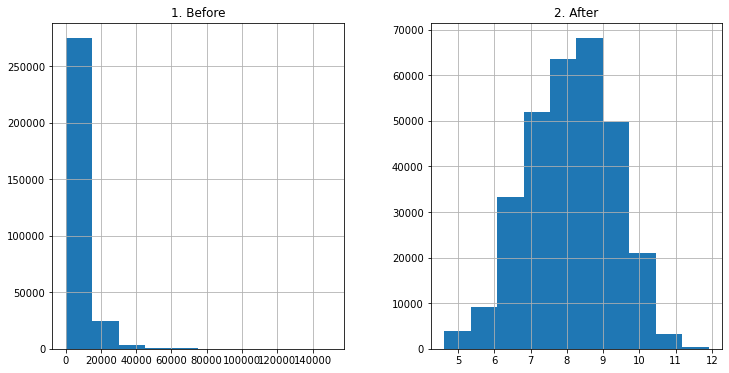

In [30]:

Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

### Basic imports and functions

In [31]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


# Percent of the X array to use as training set. This implies that the rest will be test set

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
print(X_train)
r = range(2003, 2017)
km_year = 10000



(212893, 11) (91240, 11) (212893,) (91240,)
        yearOfRegistration  powerPS  kilometer  monthOfRegistration  namelen  \
327415                1991       70     150000                    1       18   
79284                 2006      179     150000                    1       43   
270903                2003      144     150000                    5       60   
313239                2000       75     125000                    4       11   
320054                1992       90     150000                   10       26   
...                    ...      ...        ...                  ...      ...   
13633                 2001      106     150000                   11       23   
57872                 1993       88     125000                   10       10   
92807                 2007      218     125000                    4        8   
240833                2004      105     150000                    4       20   
86148                 1985       69     150000                   12       23

In [32]:
print(y_train)

327415    6.381816
79284     8.476580
270903    7.467942
313239    6.621406
320054    6.042633
            ...   
13633     6.398595
57872     6.478510
92807     9.254453
240833    7.550135
86148     6.551080
Name: price, Length: 212893, dtype: float64


In [33]:
print(X_val)

        yearOfRegistration  powerPS  kilometer  monthOfRegistration  namelen  \
64816                 2000      170     150000                    0       61   
113605                1970       88      50000                    6       13   
162017                2008      170     150000                   10       27   
277070                2002      170     150000                   12       11   
116433                2003       75     150000                   11       48   
...                    ...      ...        ...                  ...      ...   
244131                2011       90     150000                    6       15   
79173                 2016      107     150000                    8       49   
4124                  2007      170     150000                   10       19   
218918                2003      131     150000                   11       55   
69212                 1995      150     150000                    3       22   

        gearbox_feat  notRepairedDamage

In [34]:
print(y_val)

64816      7.863651
113605    10.064798
162017     9.018090
277070     8.612503
116433     7.740664
            ...    
244131     8.455531
79173      6.802395
4124       8.366603
218918     7.901377
69212      8.612685
Name: price, Length: 91240, dtype: float64


# Multi-Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [36]:
mr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_predict2=mr.predict(X_val)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict2)

0.5866304613041795

# Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [40]:
y_predict=regressor.predict(X_val)

In [41]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict)

0.7550002986105457

# Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [43]:
print(gs.best_score_)
print(gs.best_params_)
 

0.8274511046918378
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [44]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))


/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Score: 0.83


In [45]:
y_predict1=gs.predict(X_val)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predict1)

0.82781052916212

In [81]:
forest.predict([[110,150000,2001,3,1,18,118,38,2,1,1]])

1366.12636863578


/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


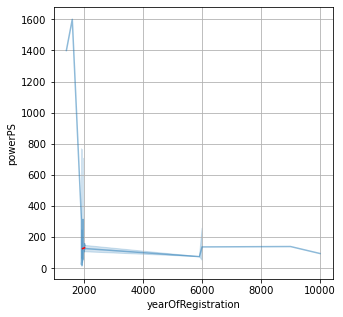

In [50]:
plt.subplots(figsize=(5, 5))
g=sns.lineplot(x=df1[df1.kilometer>=10000].yearOfRegistration ,y=df1.powerPS[df1.kilometer>=10000],  alpha=0.5)
#g.fill_between([1960,1970], 25, 245, facecolor='magenta', alpha = .15, interpolate=True)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.set_xlabel()
g.grid(axis='both')
a,b=np.polyfit(df1[df1.price<=0.01e7].yearOfRegistration, df1[df1.price<=0.01e7].powerPS, 1)
xx=np.array([1950 , 2016])
y=a*xx+b
h=sns.lineplot(xx, y, color='red')
#g.margins(tight=True)
#h.margins(tight=True)

# GRAPHS

###### plt.clf()


s=df1.pivot_table("price","brand", aggfunc="mean").plot(kind='bar', figsize=(17,5),rot=80)
s.axhline(df1.price.mean(), color="red" ,linestyle="-.",label="MEAN",marker="D")
s.arrow(20,9000,10,50000, color='magenta',head_width=5, label='mean')
s.text(28, 62000, "Mean", horizontalalignment='left', 
       size='large', color='black')
df1.pivot_table("price","fuelType", aggfunc="mean").plot(kind='bar', figsize=(9,5))
df1.pivot_table("price","salvaged", aggfunc="mean").plot(kind='bar', figsize=(5,5))
df1.pivot_table("price","salvaged", aggfunc="count").plot(kind='bar', figsize=(5,5), title="Count", legend=False)
df1.pivot_table("price","gearbox", aggfunc="mean").plot(kind='bar', figsize=(5,5))
dfp=df1.pivot_table("price","salvaged", aggfunc="count")
dfp.rename(columns={"price":"count"}, inplace=True)
dfp.plot(kind='bar', figsize=(5,5))
df1.pivot_table("powerPS","fuelType", aggfunc="mean").plot(kind='bar', figsize=(5,5))



df1.pivot_table("price","gearbox", aggfunc="mean")#.plot(kind='bar', figsize=(5,5))


[Text(0, 0, 'audi'),
 Text(1, 0, 'jeep'),
 Text(2, 0, 'volkswagen'),
 Text(3, 0, 'skoda'),
 Text(4, 0, 'bmw'),
 Text(5, 0, 'peugeot'),
 Text(6, 0, 'ford'),
 Text(7, 0, 'mazda'),
 Text(8, 0, 'nissan'),
 Text(9, 0, 'renault'),
 Text(10, 0, 'mercedes_benz'),
 Text(11, 0, 'opel'),
 Text(12, 0, 'seat'),
 Text(13, 0, 'citroen'),
 Text(14, 0, 'honda'),
 Text(15, 0, 'fiat'),
 Text(16, 0, 'mini'),
 Text(17, 0, 'smart'),
 Text(18, 0, 'hyundai'),
 Text(19, 0, 'alfa_romeo'),
 Text(20, 0, 'subaru'),
 Text(21, 0, 'volvo'),
 Text(22, 0, 'mitsubishi'),
 Text(23, 0, 'kia'),
 Text(24, 0, 'suzuki'),
 Text(25, 0, 'lancia'),
 Text(26, 0, 'porsche'),
 Text(27, 0, 'toyota'),
 Text(28, 0, 'chevrolet'),
 Text(29, 0, 'dacia'),
 Text(30, 0, 'daihatsu'),
 Text(31, 0, 'chrysler'),
 Text(32, 0, 'sonstige_autos'),
 Text(33, 0, 'jaguar'),
 Text(34, 0, 'daewoo'),
 Text(35, 0, 'rover'),
 Text(36, 0, 'saab'),
 Text(37, 0, 'land_rover'),
 Text(38, 0, 'trabant'),
 Text(39, 0, 'lada')]

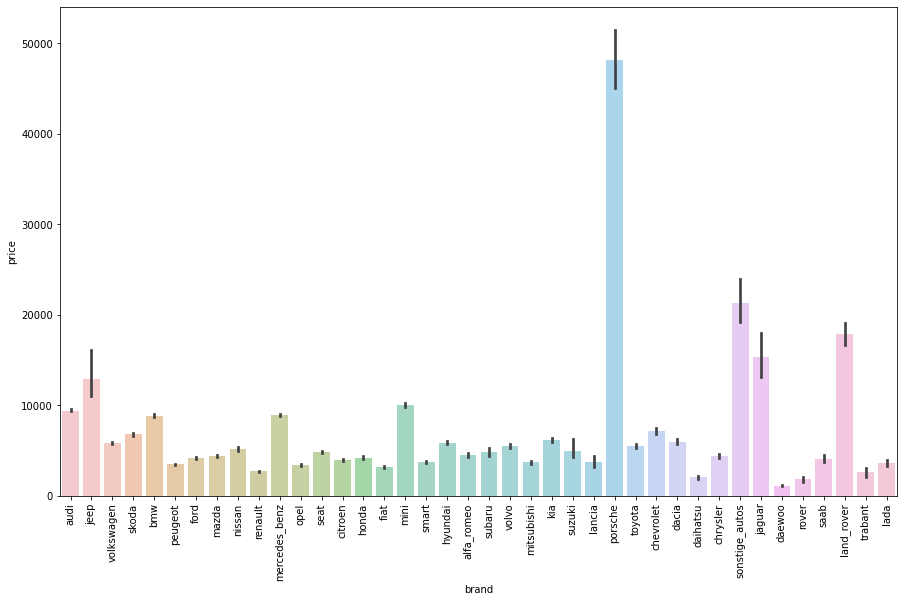

In [53]:
#df=df.drop(df[df.price>9e6].index)
plt.subplots(figsize=(15, 9))
g=sns.barplot(x=df1["brand"], y=df1["price"], data=df1,  alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#g.ax_joint.set_yscale('log')
#g.ax_joint.set_xscale('log')
#df=df.drop(df[df.powerPS<30].index)


/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


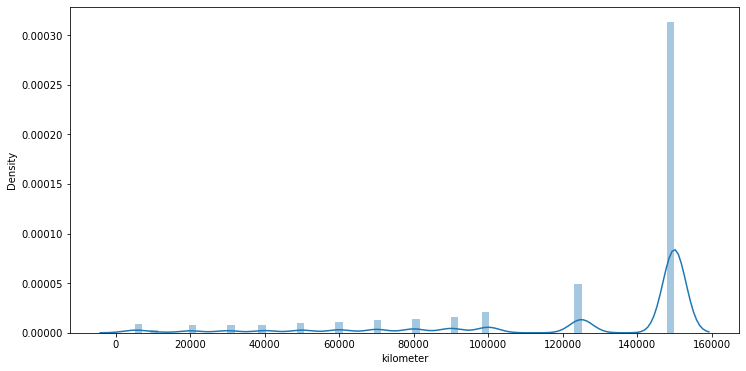

In [55]:
g=sns.distplot(df["kilometer"], bins=70)

/Users/lokeshpunati/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


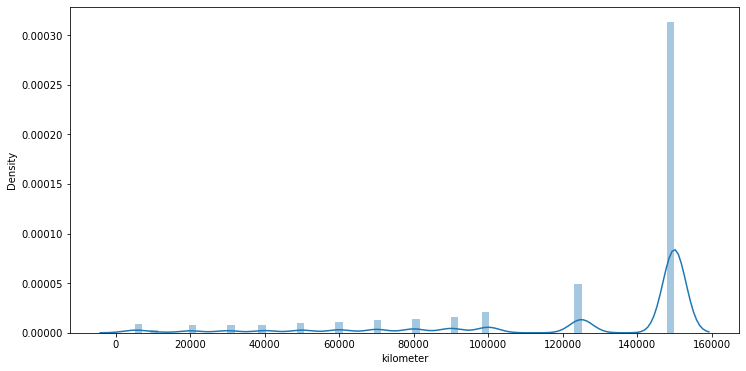

In [56]:
g=sns.distplot(df["kilometer"], bins=70)
#g.invert_xaxis()
#g.set_xticklabels(g.get_xticklabels(), rotation=60)

Text(4999.5, 800000.0, 'Erroneous Data')

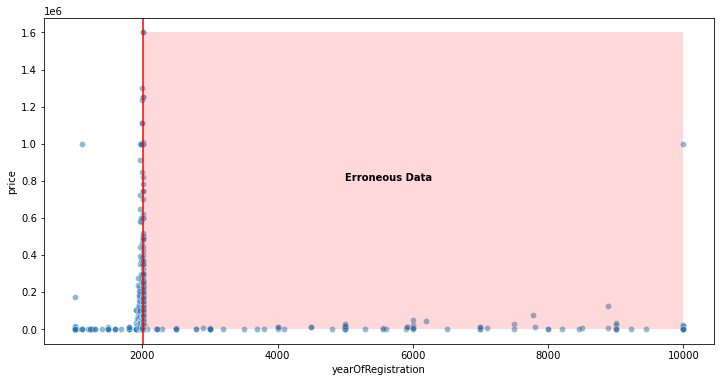

In [57]:
g=sns.scatterplot(x="yearOfRegistration", y="price", data=df,  alpha=0.5)
g.set_autoscalex_on
g.set_autoscaley_on
g.axvline(x=2016, color="red")
g.fill_between([2016,10000], 0, df.price.max(), facecolor='red', alpha = .15, interpolate=True)
g.text(df.yearOfRegistration.max()/2, df.price.max()/2, "Erroneous Data", horizontalalignment='left', size='medium', color='black', weight='semibold')


Text(10000.0, 800000.0, 'Erroneous Data')

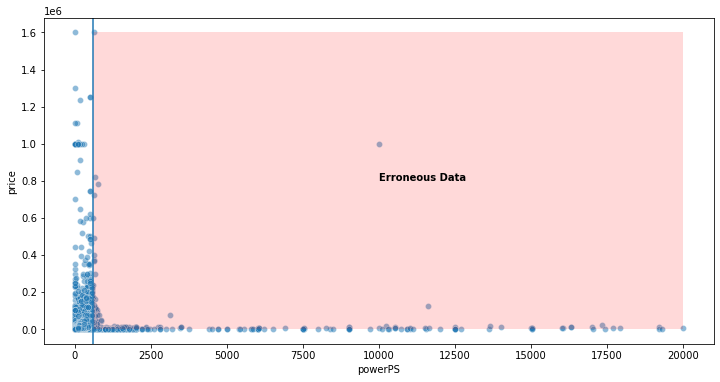

In [58]:
g=sns.scatterplot(x="powerPS", y="price", data=df,  alpha=0.5)
g.set_autoscalex_on
g.set_autoscaley_on
g.axvline(x=600)
g.fill_between([600,20000], 0, df.price.max(), facecolor='red', alpha = .15, interpolate=True)
g.text(df.powerPS.max()/2, df.price.max()/2, "Erroneous Data", horizontalalignment='left', size='medium', color='black', weight='semibold')

In [67]:
#Histograms
df1.loc[df1.price==df1.price.max()]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,salvaged
367041,Maserati_MC12,1600000,coupe,2005,NaN,625,NaN,10000,4,benzin,sonstige_autos,nein


(array([1265.,  220., 1476.,  128.,  492., 1774.,  182., 1761.,  127.,
         645., 1595.,   95., 1464.,   83.,  746., 4246.,   98., 2203.,
         100., 1054., 2902.,  102., 2500.,  165., 1183., 2162.,   86.,
        2579.,  185., 1234., 2855.,   80., 2451.,   81., 1333., 2148.,
          56., 2288.,   91., 3903.]),
 array([200.   , 219.975, 239.95 , 259.925, 279.9  , 299.875, 319.85 ,
        339.825, 359.8  , 379.775, 399.75 , 419.725, 439.7  , 459.675,
        479.65 , 499.625, 519.6  , 539.575, 559.55 , 579.525, 599.5  ,
        619.475, 639.45 , 659.425, 679.4  , 699.375, 719.35 , 739.325,
        759.3  , 779.275, 799.25 , 819.225, 839.2  , 859.175, 879.15 ,
        899.125, 919.1  , 939.075, 959.05 , 979.025, 999.   ]),
 <BarContainer object of 40 artists>)

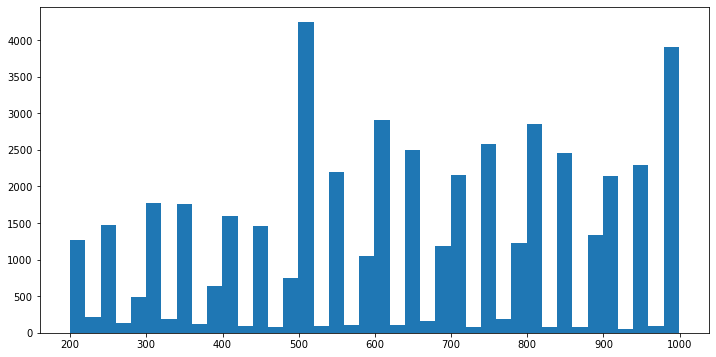

In [68]:
plt.hist(df1.price[df1.price<1000], bins=40)

<AxesSubplot:xlabel='fuelType,salvaged'>

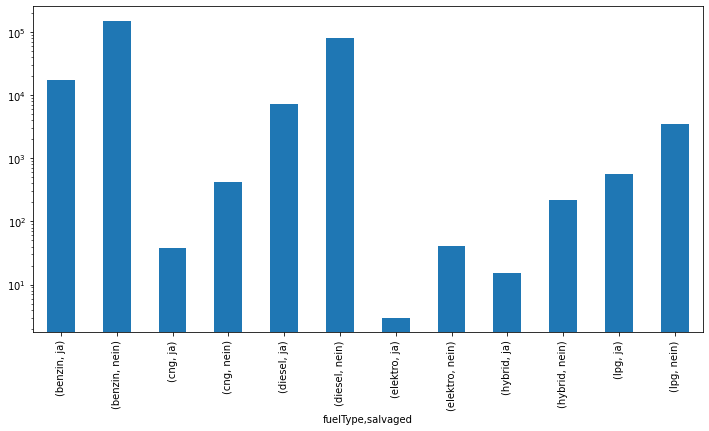

In [72]:
df1.groupby(['fuelType','salvaged']).name.count().plot(kind='bar', logy=True )

In [71]:
df1#=df1.drop('index', axis='columns')\

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,salvaged
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


<AxesSubplot:xlabel='fuelType,gearbox'>

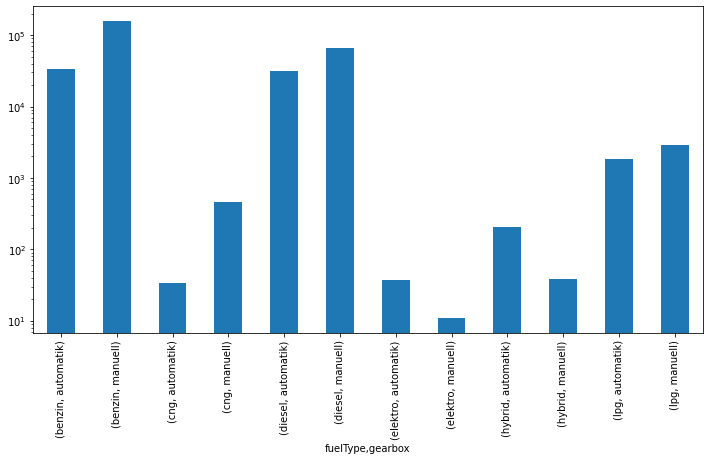

In [73]:
df1.groupby(['fuelType','gearbox']).name.count().plot(kind='bar', logy=True)

<AxesSubplot:xlabel='fuelType,gearbox'>

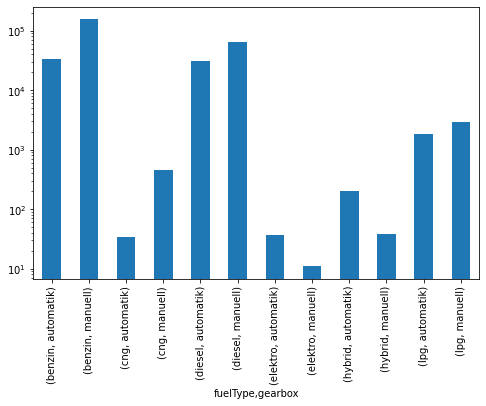

In [74]:
df1.groupby(['fuelType','gearbox']).name.count().plot(kind='bar',figsize=(8,5),logy=True)

<AxesSubplot:ylabel='Frequency'>

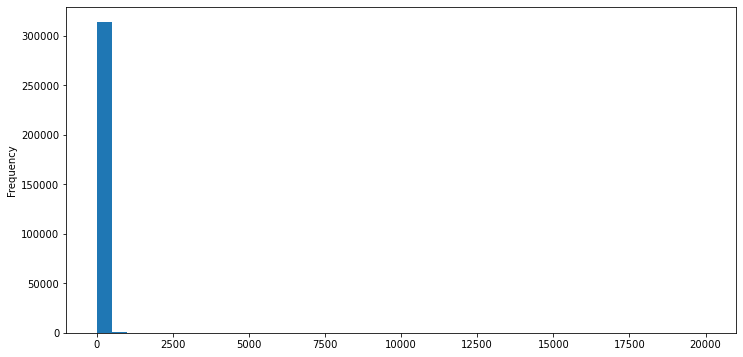

In [75]:
df1.powerPS.plot(kind='hist',bins=40)